In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import packages

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

##Define Path

In [3]:
train_image_path = "/content/drive/MyDrive/covid_data_classifier_Using_CNN/train"
test_image_path = "/content/drive/MyDrive/covid_data_classifier_Using_CNN/test"

##Display Images covid data

size of image (h x w x d) 3480 4248 3


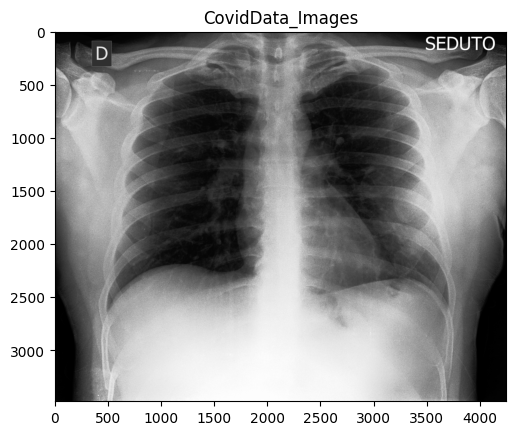

In [4]:
img = plt.imread(os.path.join(train_image_path, "Covid/02.jpeg"))
plt.imshow(img)
height, width, dim = img.shape
plt.title('CovidData_Images')
print("size of image (h x w x d)", height, width, dim)
plt.show()

##Display images of Viral Pneumonia

size of image (h x w x d) 1456 2000 3


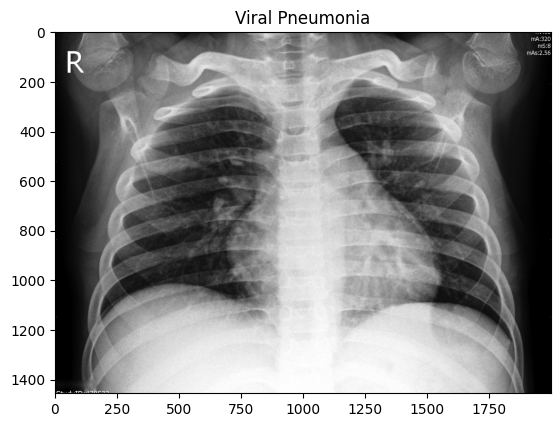

In [5]:
img = plt.imread(os.path.join(train_image_path, "Viral Pneumonia/02.jpeg"))
plt.imshow(img)
height, width, dim = img.shape
plt.title('Viral Pneumonia')
print("size of image (h x w x d)", height, width, dim)
plt.show()

##display images of Normal 

size of image (h x w x d) 2458 2720 3


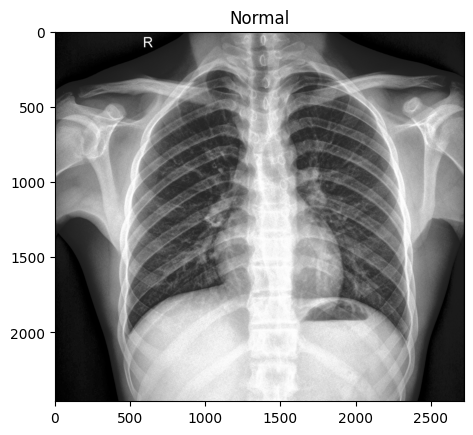

In [6]:
img = plt.imread(os.path.join(train_image_path, "Normal/03.jpeg"))
plt.imshow(img)
height, width, dim = img.shape
plt.title('Normal')
print("size of image (h x w x d)", height, width, dim)
plt.show()

##Image augmantation

In [7]:
train = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

In [8]:
train_dataset = train.flow_from_directory(
    train_image_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

Found 251 images belonging to 3 classes.


In [9]:
test = ImageDataGenerator(
    rescale=1. / 255)

In [10]:
test_dataset = test.flow_from_directory(
    test_image_path,
    target_size=(150, 150),
    batch_size=32,
    shuffle=False)

Found 66 images belonging to 3 classes.


In [11]:
print(train_dataset.class_indices)

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}


##Build the models

In [12]:
model = Sequential()
model.add(Conv2D(128, kernel_size=6, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

##Compile the models

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 145, 145, 128)     13952     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 72, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 70, 70, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 78400)             0         
                                                                 
 dense (Dense)               (None, 128)               1

##Model Trainings

In [14]:
steps_per_epoch = np.math.ceil(train_dataset.samples / train_dataset.batch_size)
epochs = 11
history = model.fit_generator(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_dataset
)

<ipython-input-14-50b9ce7e13c1>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/11
8/8 [==============================] - 112s 13s/step - loss: 1.9874 - accuracy: 0.3865 - val_loss: 1.0470 - val_accuracy: 0.6364
Epoch 2/11
8/8 [==============================] - 16s 2s/step - loss: 1.0011 - accuracy: 0.4781 - val_loss: 0.7890 - val_accuracy: 0.6364
Epoch 3/11
8/8 [==============================] - 16s 2s/step - loss: 0.5590 - accuracy: 0.7649 - val_loss: 0.5514 - val_accuracy: 0.7121
Epoch 4/11
8/8 [==============================] - 16s 2s/step - loss: 0.4753 - accuracy: 0.8167 - val_loss: 0.4811 - val_accuracy: 0.7727
Epoch 5/11
8/8 [==============================] - 16s 2s/step - loss: 0.4136 - accuracy: 0.8367 - val_loss: 0.4524 - val_accuracy: 0.7576
Epoch 6/11
8/8 [==============================] - 17s 2s/step - loss: 0.3638 - accuracy: 0.8645 - val_loss: 0.4605 - val_accuracy: 0.8182
Epoch 7/11
8/8 [==============================] - 16s 2s/step - loss: 0.2792 - accuracy: 0.9163 - val_loss: 0.5253 - val_accuracy: 0.7576
Epoch 8/11
8/8 [================

##Plot Loss and Accuracy 

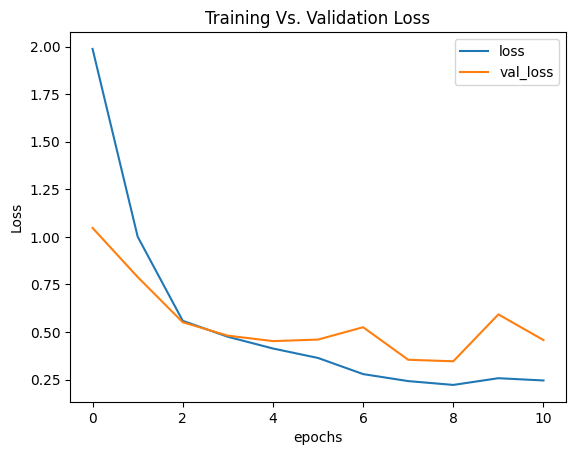

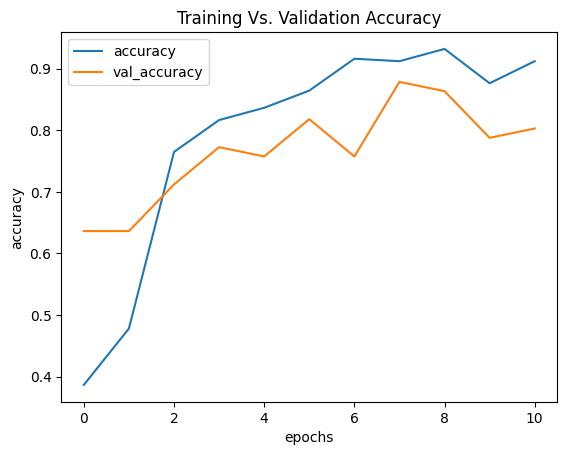

In [15]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Training Vs. Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Vs. Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


##Predictions

In [16]:
test_steps_per_epoch = np.math.ceil(test_dataset.samples / test_dataset.batch_size)
loss_accuracy = model.evaluate(test_dataset)
print(f"Loss: {loss_accuracy[0]}")
print(f"Accuracy: {loss_accuracy[1]}")
predictions = model.predict(test_dataset, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

3/3 [==============================] - 2s 487ms/step - loss: 0.4578 - accuracy: 0.8030
Loss: 0.4578460454940796
Accuracy: 0.8030303120613098
3/3 [==============================] - 3s 758ms/step


##classification Reports

In [17]:
true_classes = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys())
print("Classification Report: ")
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

Classification Report: 
                 precision    recall  f1-score   support

          Covid       1.00      0.81      0.89        26
         Normal       0.61      1.00      0.75        20
Viral Pneumonia       1.00      0.60      0.75        20

       accuracy                           0.80        66
      macro avg       0.87      0.80      0.80        66
   weighted avg       0.88      0.80      0.81        66



##Analysis the data using Confusions Matrix

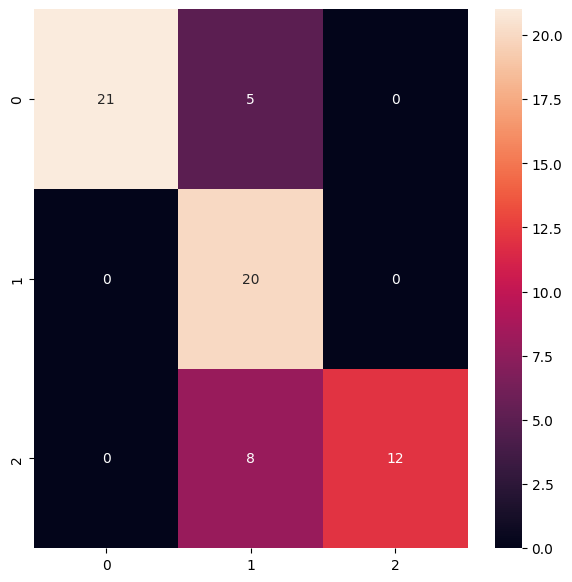

In [18]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True)
plt.show()

##Save the models

In [22]:
model.save('FinalCovidClassifier.h5')

##Testing the models

In [21]:
from tensorflow.keras.models import load_model
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

classes = ["Covid", "Normal", "Viral Pneumonia"]
model = load_model('FinalCovidClassifier.h5')

def prepareImage(imagePath):
    image_size = 150
    img_array = cv.imread(imagePath)
    img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)
    new_array = cv.resize(img_array, (image_size, image_size))
    plt.imshow(new_array)
    return new_array.reshape(-1, image_size, image_size, 3)

image = prepareImage("F:/normal.jpg")
prediction = model.predict(image)
index = np.argmax(prediction)
print(f"Prediction is {classes[index]}")
plt.show()